# Random Forests, GBM, XGBoost, LightGBM, CatBoost

In [22]:
import warnings
# Uyarıları kapatma
warnings.filterwarnings("ignore")

# NumPy, Pandas, Seaborn ve Matplotlib kütüphanelerini içe aktarma
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Scikit-learn kütüphanesinden bazı sınıfları içe aktarma
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

# XGBoost, LightGBM ve CatBoost sınıflarını içe aktarma
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
# İlgili kütüphaneleri yüklemek için kullanılacak satırlar 
!pip install catboost
!pip install xgboost
!pip install lightgbm


In [19]:
# Pandas'ın görüntüleme seçeneklerini ayarlama
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Uyarıları görmezden gelme
warnings.simplefilter(action='ignore', category=Warning)

# "diabetes.csv" dosyasını okuma
df = pd.read_csv("datasets/diabetes.csv")

# Bağımlı değişkeni (Outcome) ve bağımsız değişkenleri (X) ayarlama
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)


# Random Forest (Rastgele Ormanlar)

Random Forest, "random" (rastgele) kelimesini içinde barındırmasının sebebi, algoritmanın temelindeki "rastgelelik" kavramıdır. Random Forest, birçok karar ağacının bir araya getirilerek oluşturulduğu bir ensemble (topluluk) öğrenme algoritmasıdır.

Her bir karar ağacı, veri kümesi üzerinde eğitilirken rastgele örneklemeler (random sampling) ve rastgele özellik seçimleri yapar. Bu, her bir ağacın farklı bir alt kümesi üzerinde eğitilmesini sağlar. Ayrıca, her bir ağacın birbirinden bağımsız olması ve rastgele seçimler yapması, modelin genelleme yeteneğini artırır ve overfitting'i (aşırı uyum) engeller.

Bu rastgele örneklemeler ve özellik seçimleri sayesinde, Random Forest daha stabil ve güçlü bir model oluşturabilir. Bu nedenle, "random" kelimesi algoritmanın temel özelliklerini açıklamak için kullanılır. Bagging yöntemi random forestin temelini oluşturur.

Bagging ile Boosting arasındaki en belirgin fark;

Bagging de agaçların birbirine bağımlılıkları yoktur. Boosting de ise vardır.

In [4]:
# Random Forest sınıflandırıcı modelini oluşturma
rf_model = RandomForestClassifier(random_state=17)

# Random Forest modelinin parametrelerini görüntüleme
print("Random Forest Model Parametreleri:")
print(rf_model.get_params())

# Çapraz doğrulama (cross-validation) sonuçlarını hesaplama
cv_results = cross_validate(rf_model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

# Çapraz doğrulama sonuçlarından ortalama doğruluk (accuracy) değerini görüntüleme
print("Ortalama Accuracy:", cv_results['test_accuracy'].mean())

# Çapraz doğrulama sonuçlarından ortalama F1 skorunu görüntüleme
print("Ortalama F1 Score:", cv_results['test_f1'].mean())

# Çapraz doğrulama sonuçlarından ortalama ROC AUC skorunu görüntüleme
print("Ortalama ROC AUC Score:", cv_results['test_roc_auc'].mean())


Random Forest Model Parametreleri:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 17, 'verbose': 0, 'warm_start': False}
Ortalama Accuracy: 0.753896103896104
Ortalama F1 Score: 0.6190701534636385
Ortalama ROC AUC Score: 0.8233960113960114


Random Forest, birçok karar ağacını bir araya getirerek daha güçlü bir model oluşturan bir ensemble (topluluk) öğrenme algoritmasıdır. Random Forest'un önemli parametreleri şunlardır:

1. **max_depth:**
   - Bu parametre, her bir karar ağacının maksimum derinliğini belirler. Derinlik arttıkça modelin karmaşıklığı ve eğitim setine uyma eğilimi artar. Ancak, aşırı derin ağaçlar aşırı uydurmayı (overfitting) teşvik edebilir.

2. **max_features:**
   - Karar ağaçlarının her biri oluşturulurken kullanılacak olan özelliklerin maksimum sayısını belirler. Bu parametre, her bir alt ağacın birbirinden farklı olmasını sağlar ve modelin çeşitliliğini artırarak genelleme yeteneğini güçlendirir.

3. **min_samples_split:**
   - Bir düğümü bölmek için gereken minimum örnek sayısını belirler. Bu değer altındaki bir düğüm, daha fazla bölme yapılmadan yaprak düğümü haline gelir. Bu parametre, modelin aşırı uydurmayı önlemeye yardımcı olabilir.

4. **n_estimators:**
   - Bu parametre, Random Forest'taki karar ağaçlarının toplam sayısını belirler. Daha fazla ağaç genellikle daha iyi genelleme performansı sağlar, ancak aşırı bir noktada hesaplama maliyeti artabilir. Bu parametre, genellikle daha büyük değerlerle başladığında performansın arttığı, ancak belirli bir noktadan sonra artışın azaldığı bir eğri gösterir.

In [5]:
# Random Forest modeli için parametre arama alanını tanımlama
# parametrelere ön tanımlı değerler ve etrafındaki değerleri veriyoruz
# Ön tanımlı değer verilme sebebi en başta bulduğumuz hatadan kötü hata elde etmeyelim
rf_params = {"max_depth": [5, 8, None],
             # Ver setindeki değişken sayısından fazla olamaz;
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}

# GridSearchCV ile en iyi parametreleri bulma
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

# En iyi parametreleri görüntüleme
print("En İyi Parametreler:", rf_best_grid.best_params_)

# En iyi parametrelerle son modeli oluşturma ve eğitme
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

# Çapraz doğrulama sonuçları üzerinden modelin performansını değerlendirme
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

# Çapraz doğrulama sonuçlarından ortalama doğruluk (accuracy) değerini görüntüleme
print("Ortalama Accuracy:", cv_results['test_accuracy'].mean())

# Çapraz doğrulama sonuçlarından ortalama F1 skorunu görüntüleme
print("Ortalama F1 Score:", cv_results['test_f1'].mean())

# Çapraz doğrulama sonuçlarından ortalama ROC AUC skorunu görüntüleme
print("Ortalama ROC AUC Score:", cv_results['test_roc_auc'].mean())


Fitting 5 folds for each of 180 candidates, totalling 900 fits
En İyi Parametreler: {'max_depth': None, 'max_features': 5, 'min_samples_split': 8, 'n_estimators': 500}
Ortalama Accuracy: 0.766848940533151
Ortalama F1 Score: 0.6447777811143756
Ortalama ROC AUC Score: 0.8271054131054132


Hiperparametre optimizasyonu sonucunda az da olsa iyileşme meydana geldi.

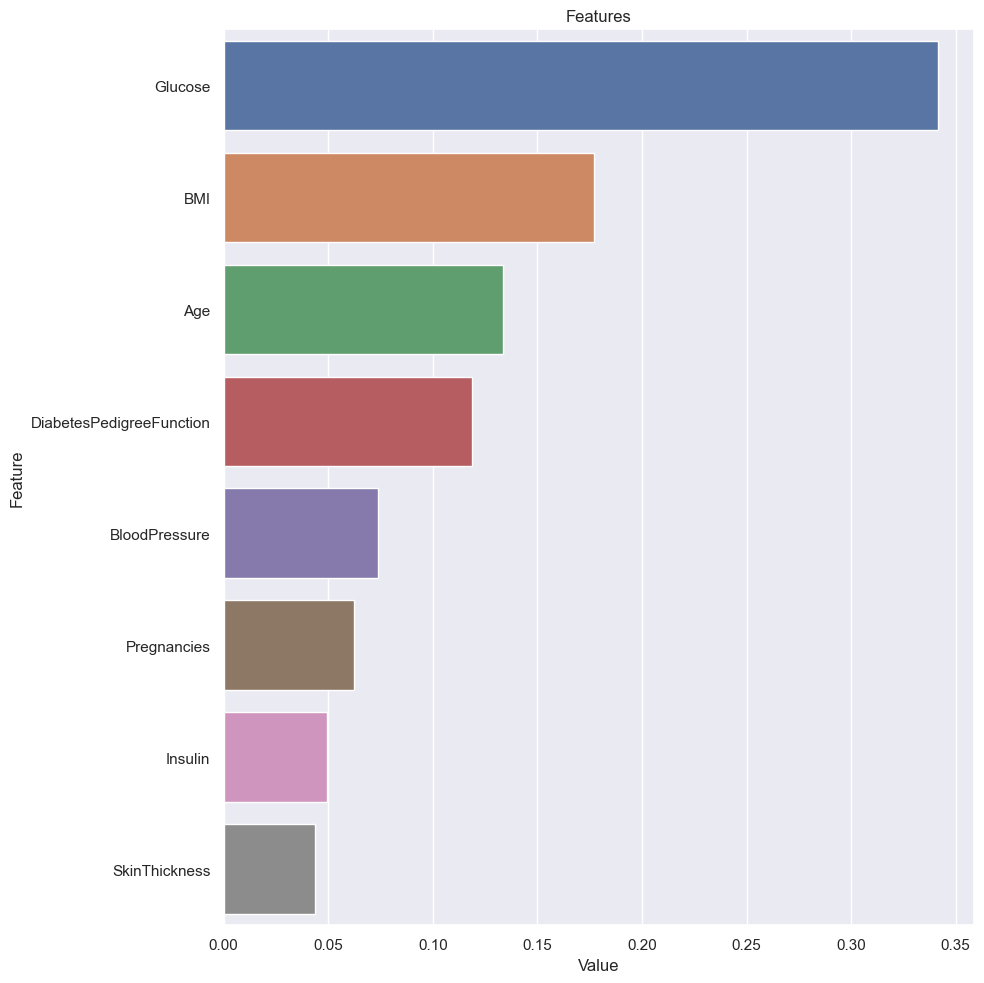

In [6]:
def plot_importance(model, features, num=len(X), save=False):
    # Modelin özellik önem skorlarını DataFrame'e çıkarma
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    
    # Özellik önem skorlarını büyükten küçüğe sıralayarak çubuk grafik çizimi
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    
    # Grafik başlığı ve düzeni
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    
    # Eğer "save" parametresi True ise, grafiği kaydetme
    if save:
        plt.savefig('importances.png')

# Oluşturulan fonksiyonu kullanarak özellik önem grafiğini çizme
plot_importance(rf_final, X)


Yukarıdaki grafiğe bakarak özelliklerimizin önem derecelerini gözlemleyebiliriz.

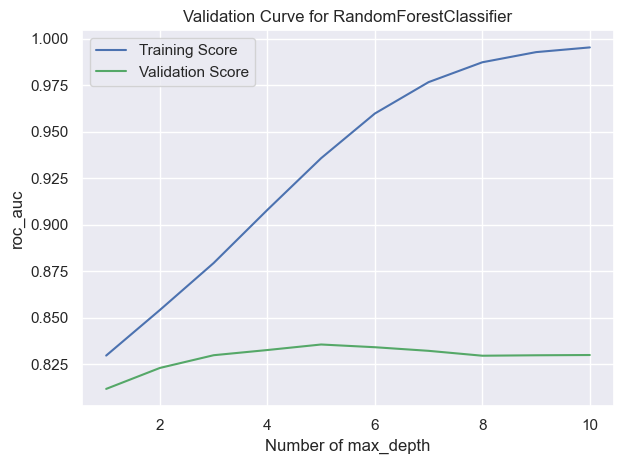

In [7]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    # Parametre aralığını kullanarak doğrulama eğrilerini oluşturma
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    # Ortalama eğitim ve test skorlarını hesaplama
    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    # Eğitim ve test skorlarını grafik üzerinde çizme
    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    # Grafik başlığı ve etiketler
    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

# Oluşturulan fonksiyonu kullanarak doğrulama eğrisini çizme
val_curve_params(rf_final, X, y, "max_depth", range(1, 11), scoring="roc_auc")


Grafikten görüldüğü üzere max_depth arttıkça eğitim setinin başarısı artıyor fakat test setinin başarısında bir artış söz konusu değil.

# GBM

GBM, "Gradient Boosting Machine" veya "Gradient Boosting Method" olarak bilinen bir makine öğrenimi tekniğidir. Bu yöntem, zayıf öğrenicileri (genellikle karar ağaçları) bir araya getirerek güçlü bir öğrenici oluşturmayı amaçlar. Gradient Boosting, bir önceki ağaçtan kaynaklanan hataları düzeltmeye odaklanarak çalışır.

Gradient Boosting'in temel prensibi şu adımları içerir:

1. **Bir Başlangıç Modeli Oluşturma:**
   - İlk önce, veri seti üzerinde basit bir model (genellikle tek bir karar ağacı) oluşturulur. Bu model, genellikle veri setinin ortalamasına veya medyanına yakın bir tahmin yapar.

2. **Hataları Düzeltme:**
   - Oluşturulan başlangıç modelinin tahminleri ile gerçek değerler arasındaki hatalar belirlenir. Bu hatalara odaklanarak bir sonraki model oluşturulur.

3. **Yeni Modelin Eklenmesi:**
   - İkinci model, önceki modelin hatalarını düzeltmeye odaklanarak oluşturulur. Bu şekilde, her bir model öncekilerin hatalarını gidermeye çalışarak topluca daha güçlü bir model oluşturur.

4. **Bu İşlemi Yineleme:**
   - Hatalar düzeltilene kadar (veya belirli bir iterasyon sayısına ulaşılana kadar) bu süreç tekrarlanır. Her bir yeni model, öncekilerin hatalarını düzeltmeye çalışır.

Gradient Boosting, regresyon problemleri ve sınıflandırma problemleri gibi çeşitli görevlerde kullanılabilir. Öne çıkan bir uygulama olan "XGBoost" (Extreme Gradient Boosting), bu teknik üzerine kurulu bir kütüphanedir ve geniş kullanım alanına sahiptir. Gradient Boosting, overfitting'e karşı direnç gösterme eğilimindedir ve genellikle yüksek performans elde etmek için ayarlanabilen bir dizi parametreye sahiptir.

In [8]:
# Gradient Boosting sınıflandırıcı modelini oluşturma
gbm_model = GradientBoostingClassifier(random_state=17)

# Gradient Boosting modelinin parametrelerini görüntüleme
gbm_model.get_params()

# Çapraz doğrulama (cross-validation) sonuçlarını hesaplama
cv_results = cross_validate(gbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

# Çapraz doğrulama sonuçlarından ortalama doğruluk (accuracy) değerini görüntüleme
print("Ortalama Accuracy:", cv_results['test_accuracy'].mean())

# Çapraz doğrulama sonuçlarından ortalama F1 skorunu görüntüleme
print("Ortalama F1 Score:", cv_results['test_f1'].mean())

# Çapraz doğrulama sonuçlarından ortalama ROC AUC skorunu görüntüleme
print("Ortalama ROC AUC Score:", cv_results['test_roc_auc'].mean())


Ortalama Accuracy: 0.7591715474068416
Ortalama F1 Score: 0.634235802826363
Ortalama ROC AUC Score: 0.8254867225716283


GBM için önemli parametreler;

1. **learning_rate:**
   - Öğrenme hızı, her adımdaki güncellemenin büyüklüğünü belirler. Düşük değerler daha güvenli ancak yavaş öğrenmeye neden olabilir.

2. **max_depth:**
   - Ağaçların maksimum derinliğini kontrol eder. Daha yüksek değerler, modelin daha karmaşık ilişkileri öğrenmesine izin verebilir ancak aşırı uyuma yol açabilir.

3. **n_estimators:**
   - Ansambl içindeki ağaç sayısını belirler. Daha fazla ağaç genellikle daha iyi performans sağlar, ancak hesaplama maliyeti artar.

4. **subsample:**
   - Her ağaç için kullanılan örneklemeyi belirler. Daha küçük değerler genelleme yeteneğini artırabilir, ancak varyansı da artırabilir.

In [9]:
# Gradient Boosting modeli için parametre arama alanını tanımlama
gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8, 10],
              "n_estimators": [100, 500, 1000],
              "subsample": [1, 0.5, 0.7]}

# GridSearchCV ile en iyi parametreleri bulma
gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

# En iyi parametreleri görüntüleme
print("En İyi Parametreler:", gbm_best_grid.best_params_)

# En iyi parametrelerle son modeli oluşturma ve eğitme
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state=17).fit(X, y)

# Çapraz doğrulama sonuçları üzerinden modelin performansını değerlendirme
cv_results = cross_validate(gbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

# Çapraz doğrulama sonuçlarından ortalama doğruluk (accuracy) değerini görüntüleme
print("Ortalama Accuracy:", cv_results['test_accuracy'].mean())

# Çapraz doğrulama sonuçlarından ortalama F1 skorunu görüntüleme
print("Ortalama F1 Score:", cv_results['test_f1'].mean())

# Çapraz doğrulama sonuçlarından ortalama ROC AUC skorunu görüntüleme
print("Ortalama ROC AUC Score:", cv_results['test_roc_auc'].mean())


Fitting 5 folds for each of 54 candidates, totalling 270 fits
En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.5}
Ortalama Accuracy: 0.7800186741363212
Ortalama F1 Score: 0.668605747317776
Ortalama ROC AUC Score: 0.8257784765897973


Hiperparametre optimzasyonu yaparak belirlenen learning_rate, max_depth, n_estimators, subsample paramet değerleri ile final modeli oluşturduk ve başarı oranımızda artış gözlemledik.

# XGBoost

GBM'in hız ve tahmin performansını arttırmak üzere optimize  edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir versiyonudur.

In [40]:
# XGBoost sınıflandırıcı modelini oluşturma
xgboost_model = XGBClassifier(random_state=17, use_label_encoder=False)

# Çapraz doğrulama (cross-validation) sonuçlarını hesaplama
cv_results = cross_validate(xgboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

# Çapraz doğrulama sonuçlarından ortalama doğruluk (accuracy) değerini görüntüleme
print("Ortalama Accuracy:", cv_results['test_accuracy'].mean())

# Çapraz doğrulama sonuçlarından ortalama F1 skorunu görüntüleme
print("Ortalama F1 Score:", cv_results['test_f1'].mean())

# Çapraz doğrulama sonuçlarından ortalama ROC AUC skorunu görüntüleme
print("Ortalama ROC AUC Score:", cv_results['test_roc_auc'].mean())


Ortalama Accuracy: 0.7409557762498938
Ortalama F1 Score: 0.6180796532975465
Ortalama ROC AUC Score: 0.7934919636617749


In [34]:
#XGBoos'tun parametrelerinin görüntüledik
print(xgboost_model.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.7, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 17, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}


XGBoost'un önemli parametrelerinin kısa açıklamaları:

1. **learning_rate (Öğrenme Oranı):**
   - Her bir ağacın katkısının büyüklüğünü kontrol eder.
   - Küçük değerler daha güvenli genelleme sağlar, ancak daha fazla ağaç gerektirir.

2. **max_depth (Maksimum Derinlik):**
   - Her bir ağacın maksimum derinliğini sınırlar.
   - Düşük derinlikler aşırı uydurmaya karşı korur, ancak modelin karmaşıklığını azaltır.

3. **n_estimators (Ağaç Sayısı):**
   - Oluşturulacak ağaç sayısını belirler.
   - Daha fazla ağaç, modelin daha karmaşık hale gelmesine neden olabilir.

4. **colsample_bytree (Ağaç için Özellik Seçimi):**
   - Her ağaç oluşturulurken kullanılacak özelliklerin yüzdesini belirler.
   - Düşük değerler overfitting'i azaltabilir, çeşitlilik ekleyebilir.

In [38]:
# XGBoost modeli için parametre arama alanını tanımlama
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.7, 1]}

# GridSearchCV ile en iyi parametreleri bulma
xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

                                 
# Bulunan hiperparametreleri ekrana yazdırıyoruz.

print("En İyi Parametreler:", xgboost_best_grid.best_params_)

En İyi Parametreler: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


Hiperparametrelerimiz aşağıdaki gibi bulunmuştur;

**learning_rate (Öğrenme Oranı):** 0.1

**max_depth (Maksimum Derinlik):** 5
   
**n_estimators (Ağaç Sayısı):** 100
   
**colsample_bytree (Ağaç için Özellik Seçimi):** 0.7

Şimdi bu parametreler ile final modelimizi oluşturalım
   

In [11]:
# En iyi parametrelerle son modeli oluşturma ve eğitme
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)

# Çapraz doğrulama sonuçları üzerinden modelin performansını değerlendirme
cv_results = cross_validate(xgboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

# Çapraz doğrulama sonuçlarından ortalama doğruluk (accuracy) değerini görüntüleme
print("Ortalama Accuracy:", cv_results['test_accuracy'].mean())

# Çapraz doğrulama sonuçlarından ortalama F1 skorunu görüntüleme
print("Ortalama F1 Score:", cv_results['test_f1'].mean())

# Çapraz doğrulama sonuçlarından ortalama ROC AUC skorunu görüntüleme
print("Ortalama ROC AUC Score:", cv_results['test_roc_auc'].mean())


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Ortalama Accuracy: 0.7630846277905101
Ortalama F1 Score: 0.6328122330962486
Ortalama ROC AUC Score: 0.8168742138364781


Görüldüğü gibi başarı skorlarımızda artış meydana gelmiştir.

# LightGBM

XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür. LightGBM, büyük veri setlerini hızlı bir şekilde işleyen, düşük bellek tüketen ve özellikle büyük boyutlu verilerle etkili çalışan bir makine öğrenimi kütüphanesidir. "Leaf-wise" ağaç büyüme stratejisi, kategorik değişken desteği ve paralel eğitim yetenekleri, LightGBM'yi performans ve verimlilik açısından avantajlı kılar.

In [12]:
# LightGBM sınıflandırıcı modelini oluşturma
lgbm_model = LGBMClassifier(random_state=17)

# Çapraz doğrulama (cross-validation) sonuçlarını hesaplama
cv_results = cross_validate(lgbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

# Çapraz doğrulama sonuçlarından ortalama doğruluk (accuracy) değerini görüntüleme
print("Ortalama Accuracy:", cv_results['test_accuracy'].mean())

# Çapraz doğrulama sonuçlarından ortalama F1 skorunu görüntüleme
print("Ortalama F1 Score:", cv_results['test_f1'].mean())

# Çapraz doğrulama sonuçlarından ortalama ROC AUC skorunu görüntüleme
print("Ortalama ROC AUC Score:", cv_results['test_roc_auc'].mean())


[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [41]:
# LightGBM modelinin parametrelerini görüntüleme
print(lgbm_model.get_params())

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.9, 'importance_type': 'split', 'learning_rate': 0.01, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 200, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 17, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


Hiperparametreleri optimize edelim ve final modelini kuralım;

In [45]:
# LightGBM modeli için parametre arama alanını tanımlama
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

# GridSearchCV ile en iyi parametreleri bulma
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

# En iyi parametrelerle son modeli oluşturma ve eğitme
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

# Çapraz doğrulama sonuçları üzerinden modelin performansını değerlendirme
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

# Çapraz doğrulama sonuçlarından ortalama doğruluk (accuracy) değerini görüntüleme
print("Ortalama Accuracy:", cv_results['test_accuracy'].mean())

# Çapraz doğrulama sonuçlarından ortalama F1 skorunu görüntüleme
print("Ortalama F1 Score:", cv_results['test_f1'].mean())

# Çapraz doğrulama sonuçlarından ortalama ROC AUC skorunu görüntüleme
print("Ortalama ROC AUC Score:", cv_results['test_roc_auc'].mean())


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [46]:
# En iyi parametreleri ekrana yazdırdık.
print("En İyi Parametreler:", lgbm_best_grid.best_params_)

En İyi Parametreler: {'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 300}


LightGBM de en önemli parametre n_estimators parametresidir. Bu parametreyi iyileştirerek daha iyi sonuçta elde etmek mümkündür. Bir önceki hiperparametre optimizasyonunda bulmuş olduğumuzda **learning_rate = 0.01** ve **colsample_bytree = 1** değerlerini kullanarak. **n_estimators** parametremizi optmize etmeye çalışıyoruz.

In [47]:
# LightGBM modeli için yeni hiperparametre değerleri ile parametre arama alanını tanımlama
# Bir önceki
lgbm_params = {"learning_rate": [0.01, 0.02, 0.05, 0.1],
               "n_estimators": [200, 300, 350, 400],
               "colsample_bytree": [0.9, 0.8, 1]}

# GridSearchCV ile en iyi parametreleri bulma
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

# En iyi parametreleri ekrana yazdırdık.
print("En İyi Parametreler:", lgbm_best_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Görüldüğü üzere diğer parametre değerlerimiz aynı kalırken **n_estimators** parameteresi **200** olarak bulundu. Buna göre yeni modelimizi kuralım;

In [48]:
# En iyi parametrelerle son modeli oluşturma ve eğitme
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

# Çapraz doğrulama sonuçları üzerinden modelin performansını değerlendirme
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

# Çapraz doğrulama sonuçlarından ortalama doğruluk (accuracy) değerini görüntüleme
print("Ortalama Accuracy:", cv_results['test_accuracy'].mean())

# Çapraz doğrulama sonuçlarından ortalama F1 skorunu görüntüleme
print("Ortalama F1 Score:", cv_results['test_f1'].mean())

# Çapraz doğrulama sonuçlarından ortalama ROC AUC skorunu görüntüleme
print("Ortalama ROC AUC Score:", cv_results['test_roc_auc'].mean())


[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Başarı skorlarımızda çok artış olmadı bu sebeple kesin emin olmak için diğer parametreleri sabit tutar sadece **n_estimators** parametresini daha geniş bir aralıkta deneyelim.

In [50]:
# LightGBM modeli için sadece n_estimators hiperparametresini optimize etme
lgbm_model = LGBMClassifier(random_state=17, colsample_bytree=0.9, learning_rate=0.01)

# Sadece n_estimators hiperparametresini içeren parametre arama alanını tanımlama
lgbm_params = {"n_estimators": [200, 400, 1000, 5000, 8000, 9000, 10000]}

# GridSearchCV ile en iyi parametreleri bulma
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

# En iyi parametrelerle son modeli oluşturma ve eğitme
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

# Çapraz doğrulama sonuçları üzerinden modelin performansını değerlendirme
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

# Çapraz doğrulama sonuçlarından ortalama doğruluk (accuracy) değerini görüntüleme
print("Ortalama Accuracy:", cv_results['test_accuracy'].mean())

# Çapraz doğrulama sonuçlarından ortalama F1 skorunu görüntüleme
print("Ortalama F1 Score:", cv_results['test_f1'].mean())

# Çapraz doğrulama sonuçlarından ortalama ROC AUC skorunu görüntüleme
print("Ortalama ROC AUC Score:", cv_results['test_roc_auc'].mean())


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [51]:
# En iyi parametreleri ekrana yazdırdık.
print("En İyi Parametreler:", lgbm_best_grid.best_params_)

En İyi Parametreler: {'n_estimators': 200}


Görüldüğü üzere **n_estimators** parameteremizin değeri yine aynı (200) kaldı değişmedi ve başarı skorlarımızda hemen hemen aynı çıktı. Bu model üzerinde pek işe yaramadı fakat normal şartlarda LightGBM uygularken buna dikkat etmekte fayda var.

# CatBoost

CatBoost, kategorik değişkenleri etkili bir şekilde işleyen, dengeli sınıflar için özel destek sunan, otomatik parametre ayarları ile kullanımı kolay bir açık kaynaklı makine öğrenimi kütüphanesidir. Hızlı, verimli ve yüksek performanslı model eğitimi sağlar.

In [18]:
# CatBoost sınıflandırıcı modelini oluşturma
# Rapor almamak için verbose=False yaptık
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

# Çapraz doğrulama (cross-validation) sonuçlarını hesaplama
cv_results = cross_validate(catboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

# Çapraz doğrulama sonuçlarından ortalama doğruluk (accuracy) değerini görüntüleme
print("Ortalama Accuracy:", cv_results['test_accuracy'].mean())

# Çapraz doğrulama sonuçlarından ortalama F1 skorunu görüntüleme
print("Ortalama F1 Score:", cv_results['test_f1'].mean())

# Çapraz doğrulama sonuçlarından ortalama ROC AUC skorunu görüntüleme
print("Ortalama ROC AUC Score:", cv_results['test_roc_auc'].mean())


Ortalama Accuracy: 0.7735251676428148
Ortalama F1 Score: 0.6502723851348231
Ortalama ROC AUC Score: 0.8378923829489867


Hiperparametre optimizasyonu yapalım;

In [21]:
# CatBoost modeli için parametre arama alanını tanımlama
catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

# GridSearchCV ile en iyi parametreleri bulma
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

# En iyi parametrelerle son modeli oluşturma ve eğitme
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

# Çapraz doğrulama sonuçları üzerinden modelin performansını değerlendirme
cv_results = cross_validate(catboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

# Çapraz doğrulama sonuçlarından ortalama doğruluk (accuracy) değerini görüntüleme
print("Ortalama Accuracy:", cv_results['test_accuracy'].mean())

# Çapraz doğrulama sonuçlarından ortalama F1 skorunu görüntüleme
print("Ortalama F1 Score:", cv_results['test_f1'].mean())

# Çapraz doğrulama sonuçlarından ortalama ROC AUC skorunu görüntüleme
print("Ortalama ROC AUC Score:", cv_results['test_roc_auc'].mean())


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Ortalama Accuracy: 0.7721755368814192
Ortalama F1 Score: 0.6322580676028952
Ortalama ROC AUC Score: 0.842001397624039


# Feature Importance - Özellik Önemi

Feature Importance, bir makine öğrenimi modelindeki özelliklerin tahmin üzerindeki etkisini ölçen bir metriktir. Bu önem dereceleri, modelin hangi özelliklere daha fazla ağırlık verdiğini ve tahminleri nasıl etkilediğini gösterir.

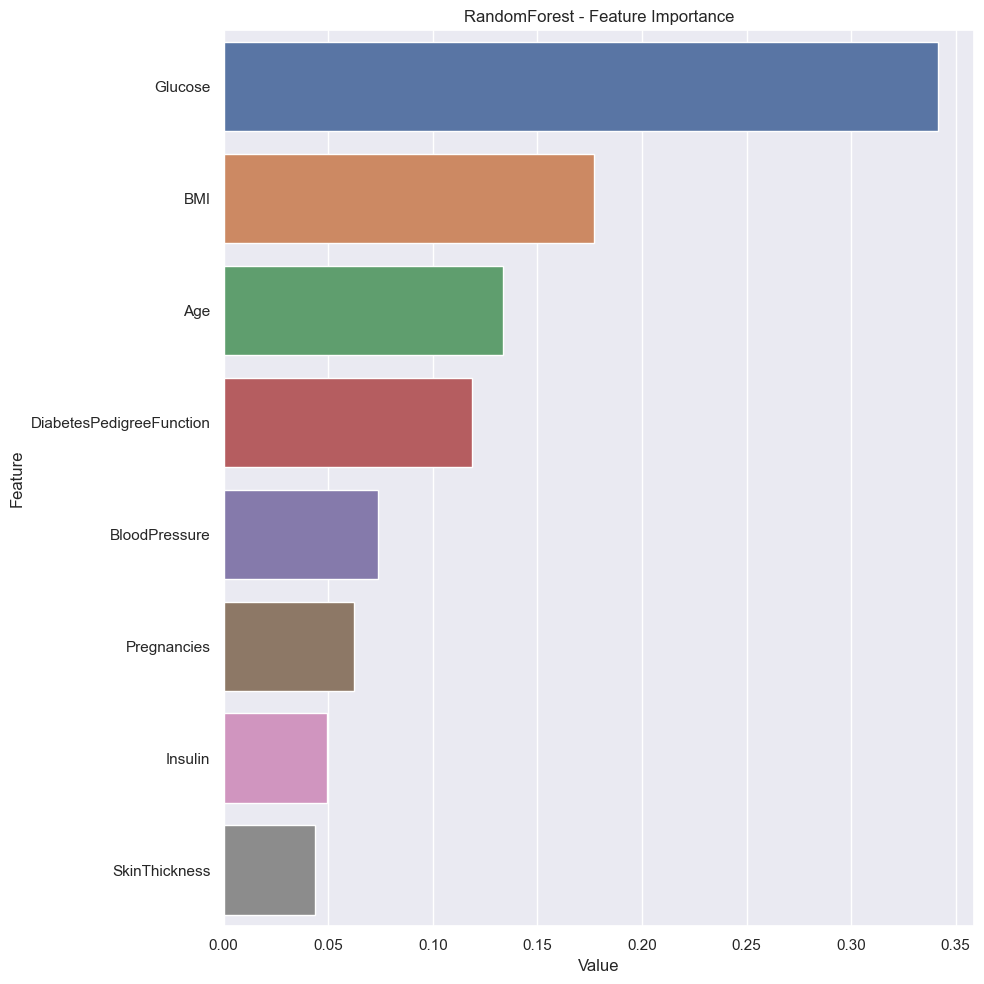

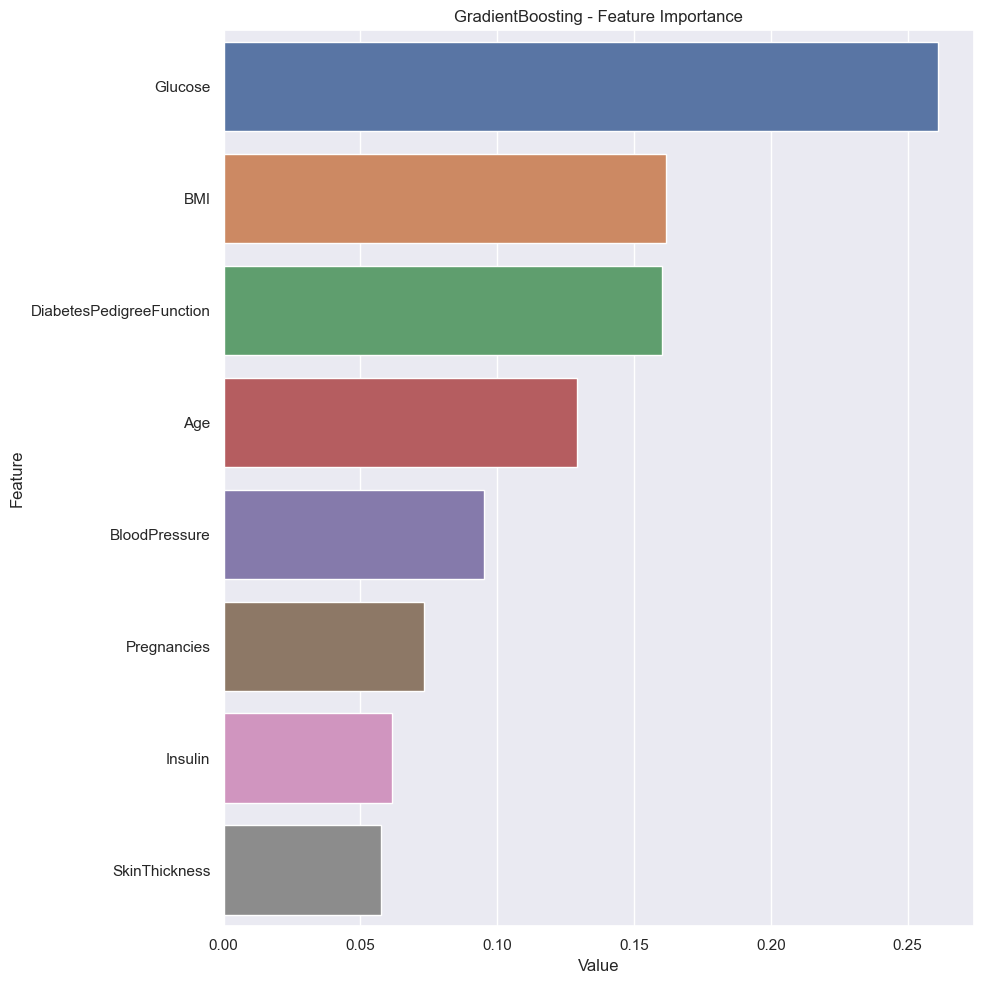

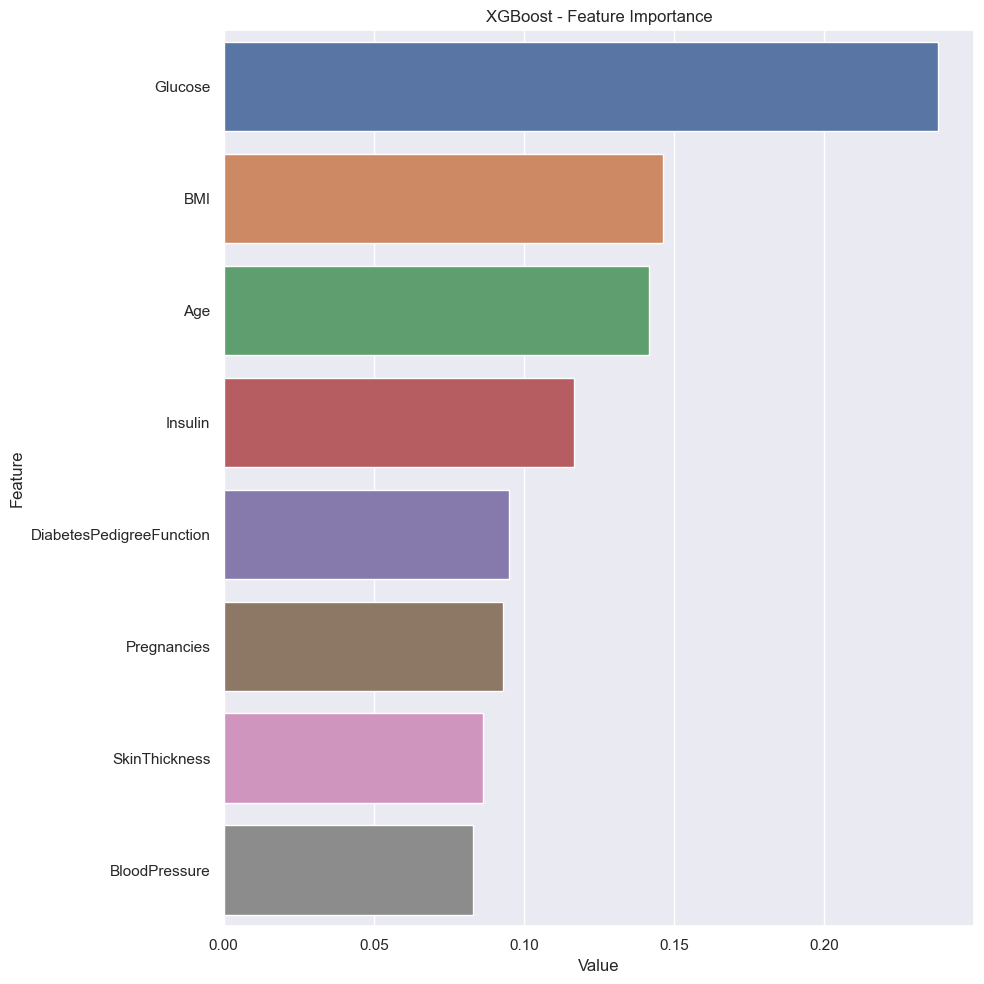

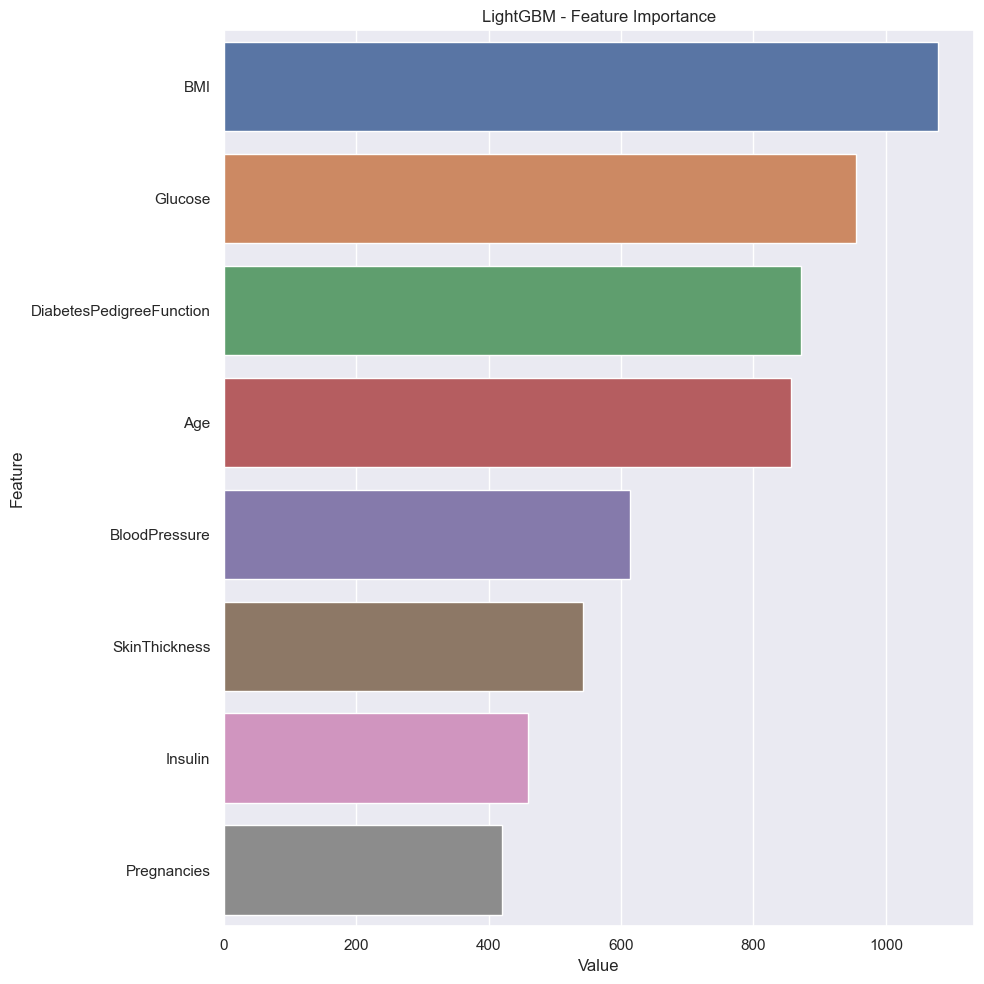

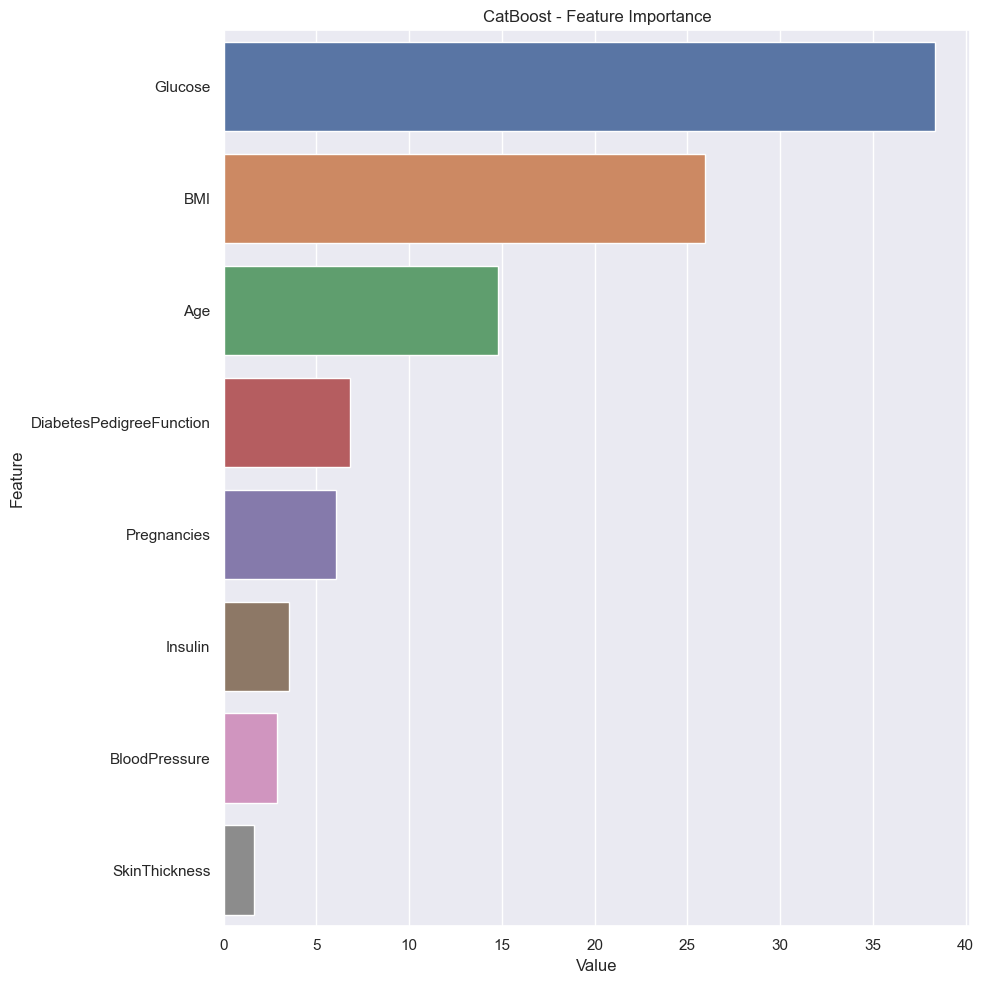

In [54]:
def plot_importance(model, features, model_name, num=len(X), save=False):
    # Modelin öznitelik önem sıralamasını içeren DataFrame'i oluşturma
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    
    # Öznitelik önem sıralamasını görselleştirme
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    
    # Grafik başlığı ekleme
    plt.title(f"{model_name} - Feature Importance")
    plt.tight_layout()
    plt.show()
    
    # Grafik kaydetme isteği kontrolü (save=True yapılırsa kaydeder)
    if save:
        plt.savefig(f'{model_name}_importances.png')

# RandomForest için öznitelik önem sıralamasını görselleştirme
plot_importance(rf_final, X, model_name='RandomForest')

# Gradient Boosting için öznitelik önem sıralamasını görselleştirme
plot_importance(gbm_final, X, model_name='GradientBoosting')

# XGBoost için öznitelik önem sıralamasını görselleştirme
plot_importance(xgboost_final, X, model_name='XGBoost')

# LightGBM için öznitelik önem sıralamasını görselleştirme
plot_importance(lgbm_final, X, model_name='LightGBM')

# CatBoost için öznitelik önem sıralamasını görselleştirme
plot_importance(catboost_final, X, model_name='CatBoost')


Yukarıdaki grafikleri incelediğinizde uygulanana yönteme göre özelliklerin önem derecesinin değişkini fark edeceksiniz. Bunun anlamı, çalıştığımız veri setinin çok toy olmasıdır. Veri seti içerisinde çok fazla değişken yok. Normalde değişken sayısı çok fazla arttıkça, model için önem derecesi yüksek olan değişkenler üzerinden modeli kurmak daha mantıklıdır. 

# Hyperparameter Optimization with RandomSearchCV (BONUS)

**`RandomSearchCV`**, makine öğrenimi modellerinde hiperparametre ayarlama için kullanılan bir yöntemdir. Hiperparametreleri rastgele seçer ve çapraz doğrulama kullanarak en iyi performansı sağlayan hiperparametre setini bulmaya çalışır.

`RandomSearchCV` ve `GridSearchCV`, makine öğrenimi modellerinde hiperparametre optimizasyonu için kullanılan iki farklı yöntemdir. İki yöntem arasındaki temel fark, hiperparametre uzayını arama stratejileridir.

1. **GridSearchCV:**
   - Grid Search, belirlenmiş bir hiperparametre uzayındaki tüm kombinasyonları sistemli bir şekilde deneyerek en iyi performansı sağlayan hiperparametre setini bulmaya çalışır.
   - Bu yöntem, belirlenen her bir hiperparametre için tüm olası değer kombinasyonlarını denemektedir, bu da daha kapsamlı ancak daha maliyetli bir arama süreci anlamına gelir.

2. **RandomSearchCV:**
   - Random Search, belirlenmiş bir hiperparametre uzayından rastgele seçilmiş hiperparametre kombinasyonlarını kullanarak arama yapar.
   - Bu yöntem, rastgele seçimler yaparak hiperparametre uzayını daha geniş bir şekilde keşfetmeye çalışır. Daha az maliyetlidir, ancak her kombinasyonu denememektedir.

**Temel Farklar:**
- **Genişlik ve Maliyet:** Grid Search, belirlenen hiperparametre aralıkları üzerinde tam bir kapsama sağlar ancak maliyetlidir. Random Search ise rastgele seçimlerle geniş bir arama yapar ve genellikle daha düşük bir maliyetle sonuç alır.
  
- **Etkinlik:** Random Search, daha kısıtlı bir hesaplama kaynağı içinde genellikle etkili bir şekilde çalışabilir. Ancak Grid Search, hiperparametre uzayının boyutu büyüdükçe hesaplama maliyeti artabilir.

Hangi yöntemin kullanılacağı, hiperparametre uzayının boyutu, bilgi işleme kaynakları ve zaman sınırlamalarına bağlıdır. Random Search, daha büyük ve karmaşık hiperparametre uzaylarında etkili olabilir, ancak Grid Search daha küçük uzaylarda daha eksiksiz bir arama sağlayabilir.

# ÖNEMLİ !

Hiperparametre optimizasyonu yapılırken en mantıklı yöntem öncelikle **RandomSearchCV** yöntemi ile rastgele geniş aralıkta hiperparametre optimizasyonu yapmaktır. Daha sonra elde edilen bu parametre değer ve çevresindeki değerler ile **GridSearchCV** uygulayarak en doğru hiperparametreye ulaşmak mümkündür.

In [25]:
# RandomForest için rastgele arama ile hiperparametre optimizasyonu
rf_model = RandomForestClassifier(random_state=17)

# Rastgele arama için parametre dağılımlarını tanımlama
                    # 5 den 50 ye kadar 10 tane rastgele sayı oluşturmasını söyledik
rf_random_params = {"max_depth": np.random.randint(5, 50, 10),
                    "max_features": [3, 5, 7, "auto", "sqrt"],
                    # 2 den 50 ye kadar 20 tane rastgele sayı oluşturacak
                    "min_samples_split": np.random.randint(2, 50, 20),
                    # 200 den 1500 e kadar 10 tane rastgele sayı oluşturacak
                    "n_estimators": [int(x) for x in np.linspace(start=200, stop=1500, num=10)]}

# RandomizedSearchCV ile en iyi parametreleri bulma
rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=rf_random_params,
                               n_iter=100,  # denenecek parametre sayısı
                               cv=3,
                               verbose=True,
                               random_state=42,
                               n_jobs=-1)

# Rastgele arama ile en iyi parametreleri bulma ve modeli eğitme
rf_random.fit(X, y)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=17),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([45, 34,  7, 10, 25, 14, 27, 29, 35, 27]),
                                        'max_features': [3, 5, 7, 'auto',
                                                         'sqrt'],
                                        'min_samples_split': array([30, 26, 18,  6, 41, 47, 38, 49,  8, 33, 41, 47, 14,  3, 39, 47,  8,
        2, 23, 37]),
                                        'n_estimators': [200, 344, 488, 633,
                                                         777, 922, 1066, 1211,
                                                         1355, 1500]},
                   random_state=42, verbose=True)

In [58]:
# RandomizedSearchCV ile bulunan en iyi parametreleri ekrana yazdırdık.
print("En İyi Parametreler:",rf_random.best_params_)

En İyi Parametreler: {'n_estimators': 1355, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 35}


**NOT =** Optimum hiperparametre belirlemek için burada elde elien parametre değerlerinin çevresinde GridSearchCV uygulanmalıdır (Örneğin n_estimators = 1250, 1300, 1355, 1400, 1450 gibi). Bu yöntemi de kendiniz uygulayarak sonucu gözlemlemenizi tavsiye ederim. 

Biz bulunan hiperparametre değerleri ile final modelimizi oluşturamaya devam edelim;

In [59]:
# En iyi parametrelerle son modeli oluşturma ve eğitme
rf_random_final = rf_model.set_params(**rf_random.best_params_, random_state=17).fit(X, y)

# Çapraz doğrulama sonuçları üzerinden modelin performansını değerlendirme
cv_results = cross_validate(rf_random_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

# Çapraz doğrulama sonuçlarından ortalama doğruluk (accuracy) değerini görüntüleme
print("Ortalama Accuracy:", cv_results['test_accuracy'].mean())

# Çapraz doğrulama sonuçlarından ortalama F1 skorunu görüntüleme
print("Ortalama F1 Score:", cv_results['test_f1'].mean())

# Çapraz doğrulama sonuçlarından ortalama ROC AUC skorunu görüntüleme
print("Ortalama ROC AUC Score:", cv_results['test_roc_auc'].mean())


Ortalama Accuracy: 0.7722264663441134
Ortalama F1 Score: 0.6424708479935627
Ortalama ROC AUC Score: 0.8325849056603772


# Analyzing Model Complexity with Learning Curves (BONUS)

**Öğrenme Eğrileri ile Model Karmaşıklığını Analiz Etme**

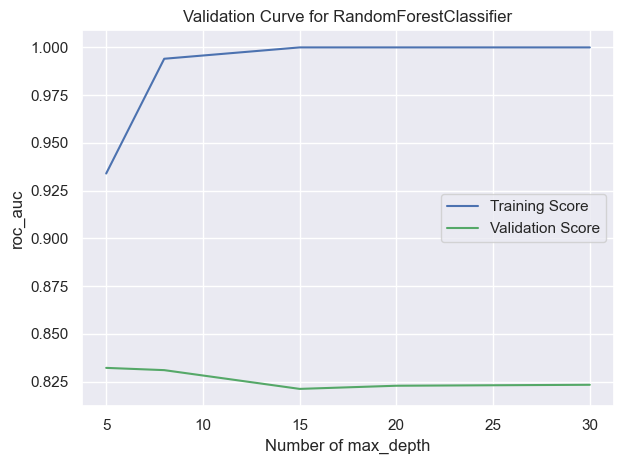

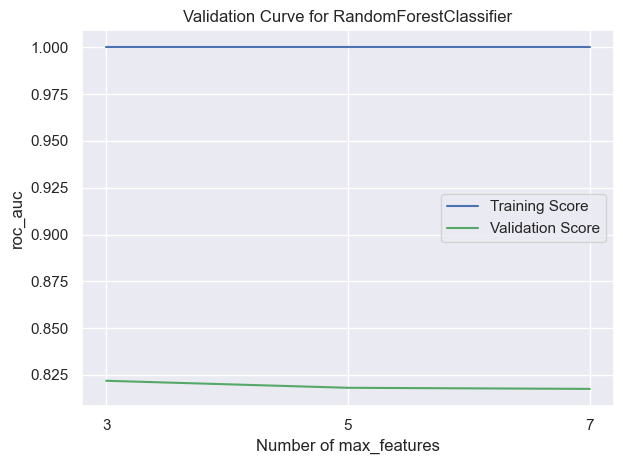

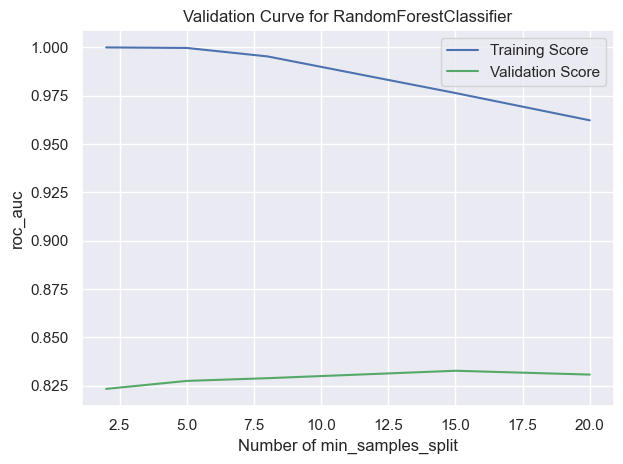

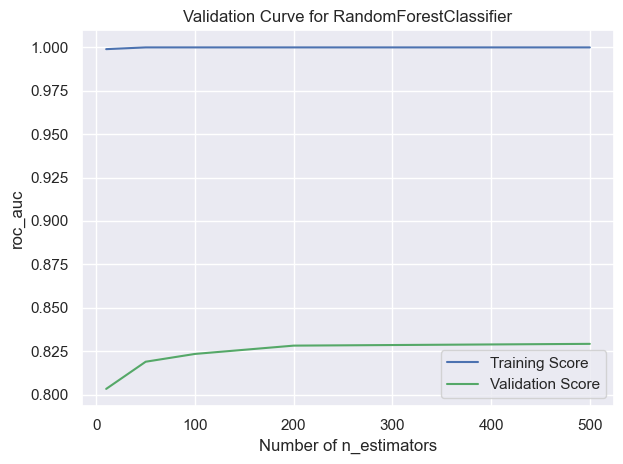

[5, 8, 15, 20, 30, None]

In [27]:
# Hiperparametre değerlendirme eğrisi çizme fonksiyonu
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    # validation_curve fonksiyonunu kullanarak eğitim ve doğrulama skorlarını hesapla
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    # Eğitim skorlarının ortalamasını al
    mean_train_score = np.mean(train_score, axis=1)
    # Doğrulama skorlarının ortalamasını al
    mean_test_score = np.mean(test_score, axis=1)

    # Skorları parametre değerleri ile birlikte çiz
    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    # Grafik üzerine başlık ve etiketler ekleme
    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

# RandomForest için değerlendirme eğrilerini çizme
rf_val_params = [["max_depth", [5, 8, 15, 20, 30, None]],
                 ["max_features", [3, 5, 7, "auto"]],
                 ["min_samples_split", [2, 5, 8, 15, 20]],
                 ["n_estimators", [10, 50, 100, 200, 500]]]

# RandomForest modelini oluşturma
rf_model = RandomForestClassifier(random_state=17)

# Her bir hiperparametre için değerlendirme eğrisi çizme
for i in range(len(rf_val_params)):
    val_curve_params(rf_model, X, y, rf_val_params[i][0], rf_val_params[i][1])

# Örneğin, max_depth için değerlendirme eğrisini gösterme
rf_val_params[0][1]
